## 1. 데이터 확인

In [1]:
import pandas as pd

train = pd.read_csv('~/aiffel/basic/project/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 2. to_datetime

In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])

# 6가지 컬럼 생성

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 3. datetime 파생 데이터 개수 시각화

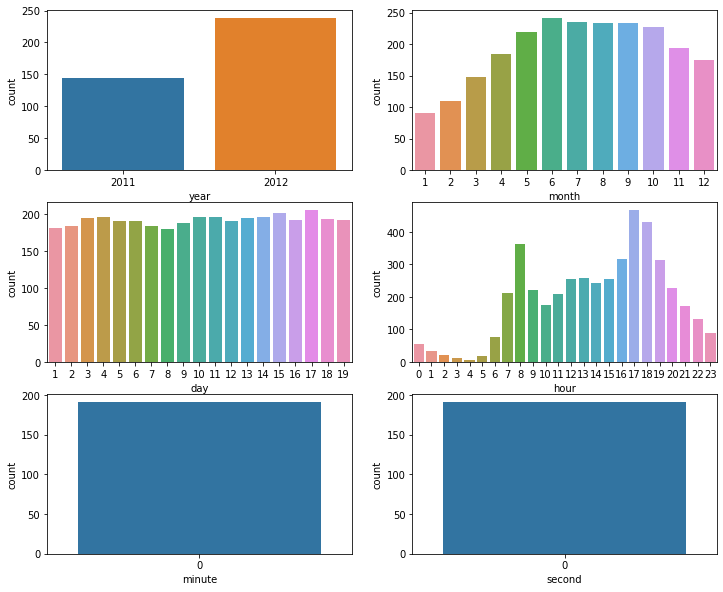

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(3,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(3,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

#minute와 count
ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(x='minute',y='count',data=train.groupby('minute')['count'].mean().reset_index())

#second와 count
ax6 = fig.add_subplot(3,2,6)
ax6 = sns.barplot(x='second',y='count',data=train.groupby('second')['count'].mean().reset_index())

## 3. feature select

In [5]:
X = train[['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month', 'day', 'hour']].values
y = train['count'].values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 10) (8708,)
(2178, 10) (2178,)


## 4. 모델 학습

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

array([256.41868691,  53.55853034, 200.40229695, ..., 310.53826448,
        41.49077159, 243.96153633])

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

19982.926535093462
141.36097953499566


## 5. 시각화

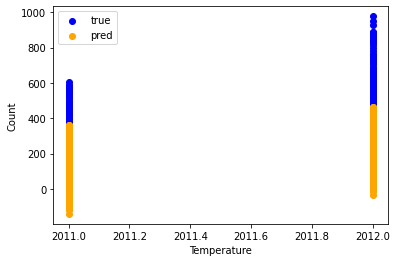

In [10]:
plt.scatter(X_test[:, 6], y_test, label="true", color="blue")
plt.scatter(X_test[:, 6], predictions, label="pred", color="orange")

plt.xlabel("Temperature") 
plt.ylabel("Count") 

plt.legend()
plt.show()

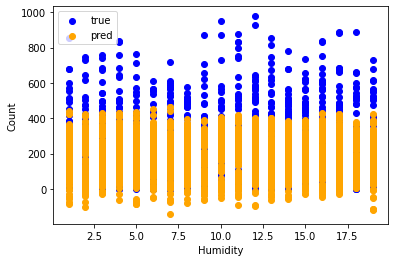

In [11]:
plt.scatter(X_test[:, 8], y_test, label="true", color="blue")
plt.scatter(X_test[:, 8], predictions, label="pred", color="orange")

plt.xlabel("Humidity") 
plt.ylabel("Count") 

plt.legend()
plt.show()

시각화를 하는데 자꾸 이상해서 보니 학습 전, 불필요한 컬럼들을 지워서 컬럼의 순서가 달라진 거였다.

사실 정규 프로젝트 진행 시간에는 시간이 부족해 급하게 진행했는데 시각화가 너무 이상해서 2번 프로젝트는 마무리를 못한 채로 정우님과 코드리뷰를 진행했다.

처음 코드리뷰를 진행할 때 정우님도 같은 문제를 겪으셨고, 컬럼을 삭제하면서 순서가 달라졌기 때문에 이상했던 거였다는 설명을 해주셨었는데,

정규 수업이 끝나고 다시 내 코드를 천천히 살펴보니 사실 나도 같은 문제였음을 발견했다.   
아마 오늘 정우님과 코드 리뷰를 안 했으면 아마 꽤 오랜 시간 고민했을 것이다.

다른 사람과 코드에 대해서 공유하는 것이 얼마나 중요한 일인지 크게 체감할 수 있었다.   
그리고 앞으로는 데이터에 변형을 주었을 때 결과를 항상 print 해보는 습관을 들여야겠다.

다음은 수정된 시각화이다.

In [13]:
X_test_df = pd.DataFrame(X_test, columns=['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month', 'day', 'hour'])
print(X_test_df.head())

   holiday  workingday  weather   temp   atemp  humidity    year  month   day  \
0      0.0         1.0      1.0  33.62  40.150      59.0  2011.0    7.0  19.0   
1      1.0         0.0      1.0   4.10   6.820      54.0  2012.0    1.0  16.0   
2      0.0         0.0      1.0   9.84  11.365      48.0  2011.0   12.0  11.0   
3      0.0         1.0      2.0  29.52  34.090      62.0  2012.0    8.0  15.0   
4      0.0         1.0      1.0  25.42  31.060      53.0  2012.0    6.0  15.0   

   hour  
0  11.0  
1   6.0  
2  18.0  
3  10.0  
4  23.0  


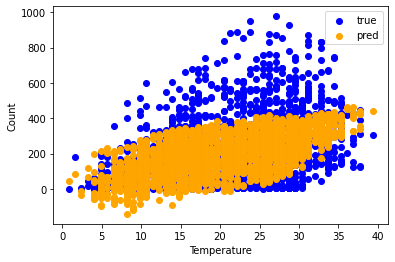

In [14]:
plt.scatter(X_test[:, 3], y_test, label="true", color="blue")
plt.scatter(X_test[:, 3], predictions, label="pred", color="orange")

plt.xlabel("Temperature") 
plt.ylabel("Count") 

plt.legend()
plt.show()

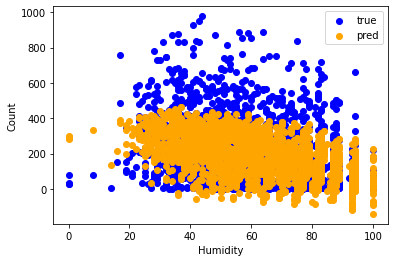

In [15]:
plt.scatter(X_test[:, 5], y_test, label="true", color="blue")
plt.scatter(X_test[:, 5], predictions, label="pred", color="orange")

plt.xlabel("Humidity") 
plt.ylabel("Count") 

plt.legend()
plt.show()